In [8]:
import json
import pandas as pd
import os

In [10]:
def read_json(file_path):
    with open(file_path, "r") as f:
        json_input = json.load(f)
    return json_input

def read_all_json_files(JSON_ROOT):
    for direpath, direnames, filenames in os.walk(JSON_ROOT):
        result = []
        for f in filenames:
            if f.endswith('.json'):
                json_content_2 = read_json(os.path.join(JSON_ROOT,f))
                for i in json_content_2["results"]:
                    i["source"] = f
                    result.append(i)
        df = pd.DataFrame(result)
        return df
    
df_daily_summaries = read_all_json_files('./data/daily_summaries')

In [11]:
df_daily_summaries

,date,datatype,station,attributes,value,source
0,2018-01-27T00:00:00,SNOW,GHCND:US1DENC0031,",,N,",0,daily_summaries_FIPS10003_jan_2018_1json.json
1,2018-01-27T00:00:00,PRCP,GHCND:US1DENC0032,",,N,",0,daily_summaries_FIPS10003_jan_2018_1json.json
2,2018-01-27T00:00:00,PRCP,GHCND:US1DENC0033,",,N,",0,daily_summaries_FIPS10003_jan_2018_1json.json
3,2018-01-27T00:00:00,SNOW,GHCND:US1DENC0033,",,N,",0,daily_summaries_FIPS10003_jan_2018_1json.json
4,2018-01-27T00:00:00,PRCP,GHCND:US1DENC0035,",,N,",0,daily_summaries_FIPS10003_jan_2018_1json.json
...,...,...,...,...,...,...
1164,2018-01-27T00:00:00,PRCP,GHCND:US1DENC0013,",,N,",0,daily_summaries_FIPS10003_jan_2018_0.json.json
1165,2018-01-27T00:00:00,SNOW,GHCND:US1DENC0013,",,N,",0,daily_summaries_FIPS10003_jan_2018_0.json.json
1166,2018-01-27T00:00:00,PRCP,GHCND:US1DENC0028,",,N,",0,daily_summaries_FIPS10003_jan_2018_0.json.json
1167,2018-01-27T00:00:00,SNOW,GHCND:US1DENC0028,",,N,",0,daily_summaries_FIPS10003_jan_2018_0.json.json


How many stations are there in total for FIPS10003

In [12]:
df_daily_summaries['station'].nunique()

17

Create a DataFrame called temps_max that only contains the entries from df_daily_summaries where the datatype column is equal to TMAX. This DataFrame should only retain the date column and the value column.

In [29]:
temps_max = df_daily_summaries[(df_daily_summaries['datatype'] == "TMAX")]
temps_max = temps_max[['date' , 'datatype' , 'value']]

In [30]:
temps_max

,date,datatype,value
17,2018-01-27T00:00:00,TMAX,150
46,2018-01-28T00:00:00,TMAX,133
88,2018-01-29T00:00:00,TMAX,78
124,2018-01-30T00:00:00,TMAX,39
163,2018-01-31T00:00:00,TMAX,6
204,2018-01-01T00:00:00,TMAX,-60
244,2018-01-02T00:00:00,TMAX,-38
286,2018-01-03T00:00:00,TMAX,-5
334,2018-01-04T00:00:00,TMAX,-21
374,2018-01-05T00:00:00,TMAX,-82


How many entries are there in the temps_max DataFrame? What are the mean, min, and max values?

In [34]:
temps_max['date'].nunique()

31

Let's graph this DataFrame so we can get a visual representation for this information.

In [35]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [36]:
%matplotlib inline

In [37]:
x = temps_max['date'].str[8:10]
y = temps_max['value'] / 10

[Text(0, 0.5, 'temperature in celsius'),
 Text(0.5, 0, 'day of month'),
 Text(0.5, 1.0, 'Max Temperatures Jan 2018')]

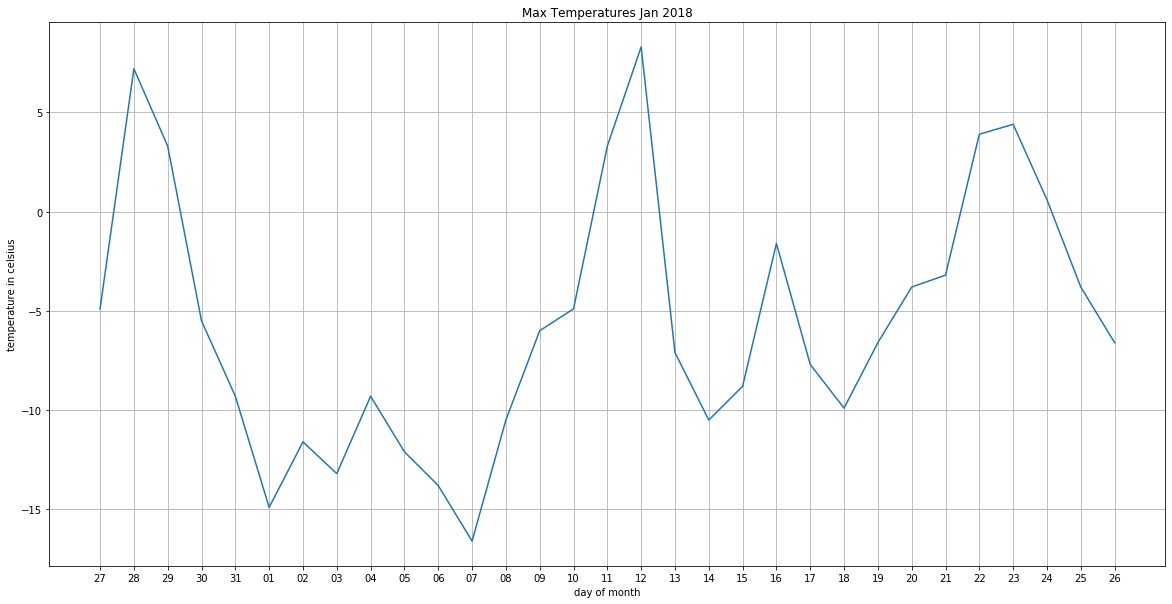

In [50]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.plot(x, y)
ax.grid()
ax.set(xlabel='day of month', ylabel='temperature in celsius', title='Max Temperatures Jan 2018')

Create a DataFrame called temps_min that only contains the entries from df_daily_summaries where the datatype column is equal to TMIN. This DataFrame should only retain the date column and the value column.

In [42]:
temps_min = df_daily_summaries[(df_daily_summaries['datatype'] == "TMIN")]
temps_min = temps_min[['date' , 'datatype' , 'value']]

In [43]:
temps_min

,date,datatype,value
18,2018-01-27T00:00:00,TMIN,-49
47,2018-01-28T00:00:00,TMIN,72
89,2018-01-29T00:00:00,TMIN,33
125,2018-01-30T00:00:00,TMIN,-55
164,2018-01-31T00:00:00,TMIN,-93
205,2018-01-01T00:00:00,TMIN,-149
245,2018-01-02T00:00:00,TMIN,-116
287,2018-01-03T00:00:00,TMIN,-132
335,2018-01-04T00:00:00,TMIN,-93
375,2018-01-05T00:00:00,TMIN,-121


How many entries are there in the temps_min DataFrame? What are the mean, min, and max values?

In [46]:
temps_min.describe()

,value
count,31.000000
mean,-55.225806
std,65.749378
min,-166.000000
25%,-102.000000
50%,-66.000000
75%,-24.000000
max,83.000000


Graph the temps_min DataFrame

[Text(0, 0.5, 'temperature in celsius'),
 Text(0.5, 0, 'day of month'),
 Text(0.5, 1.0, 'Min Temperatues Jan 2018')]

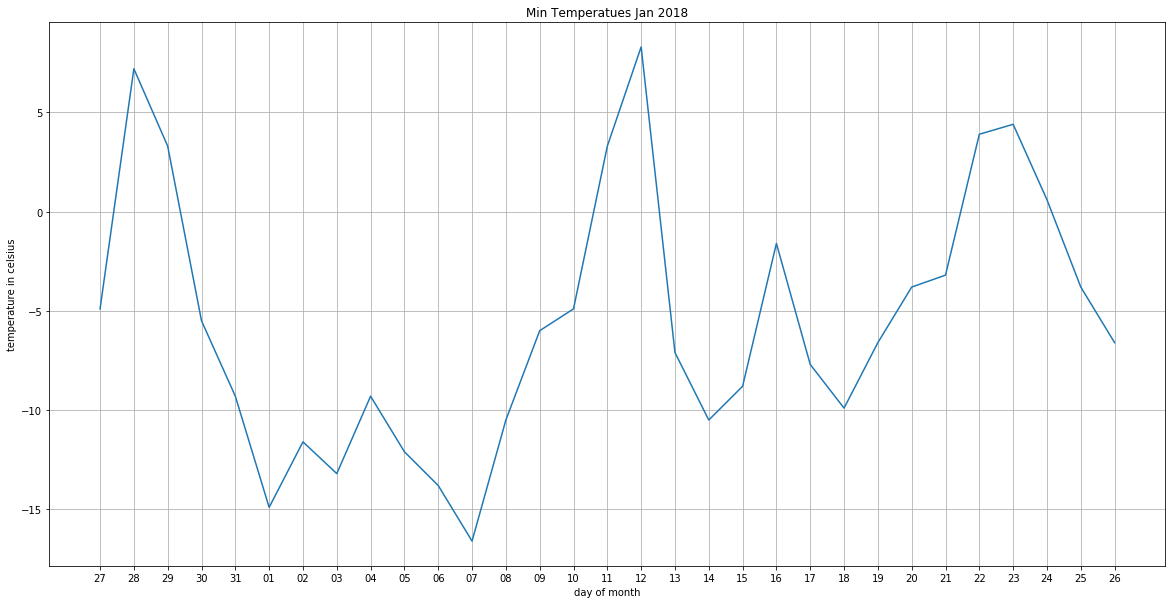

In [47]:
x = temps_min['date'].str[8:10]
y = temps_min['value'] / 10
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.plot(x, y)
ax.grid()
ax.set(xlabel='day of month', ylabel='temperature in celsius', title='Min Temperatures Jan 2018')

We can also plot both of these lines in the same graph.

[Text(0, 0.5, 'temperature in celsius'),
 Text(0.5, 0, 'day of month'),
 Text(0.5, 1.0, 'Min & Max Temperatures Jan 2018')]

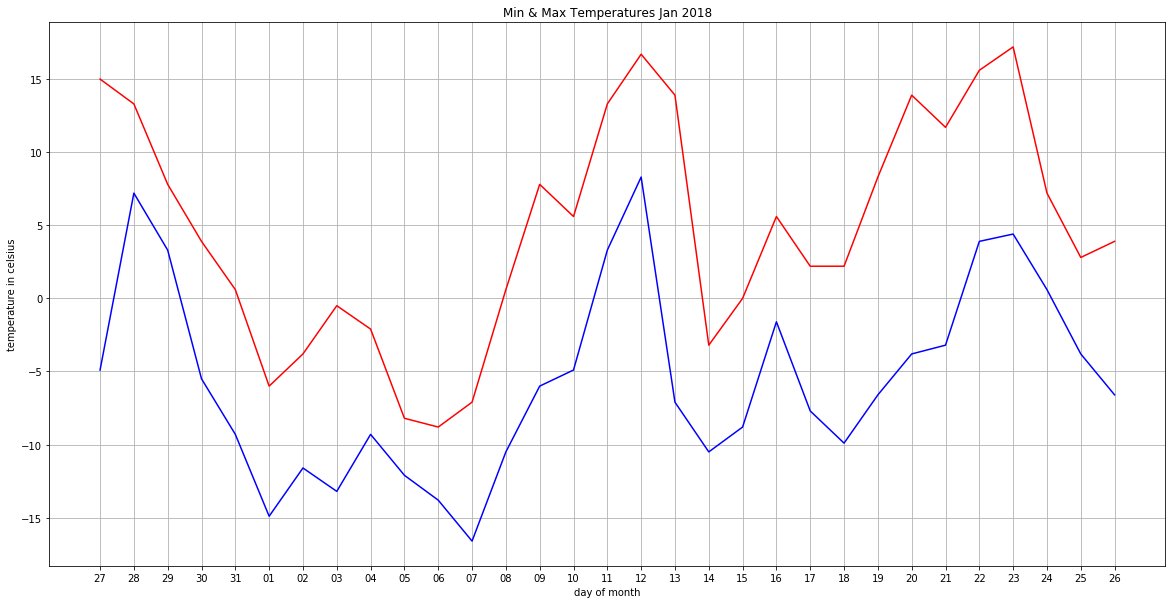

In [49]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.plot(x, temps_max['value'] / 10, color='red')
ax.plot(x, temps_min['value'] / 10, color='blue')
ax.grid()
ax.set(xlabel='day of month', ylabel='temperature in celsius', title='Min & Max Temperatures Jan 2018')